# 당뇨병 데이터 셋 - 다중회귀
1) feature 영향
2) Linear Regression vs DecisionTreeRegressor - test-size = 0.1
3) Model 성능 MSE

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [67]:
features = df.columns[0:-1]
print(features)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


### 1. 그래프 그리기

In [45]:
#sns.regplot(x='bmi', y='target', data=df)
#plt.show()

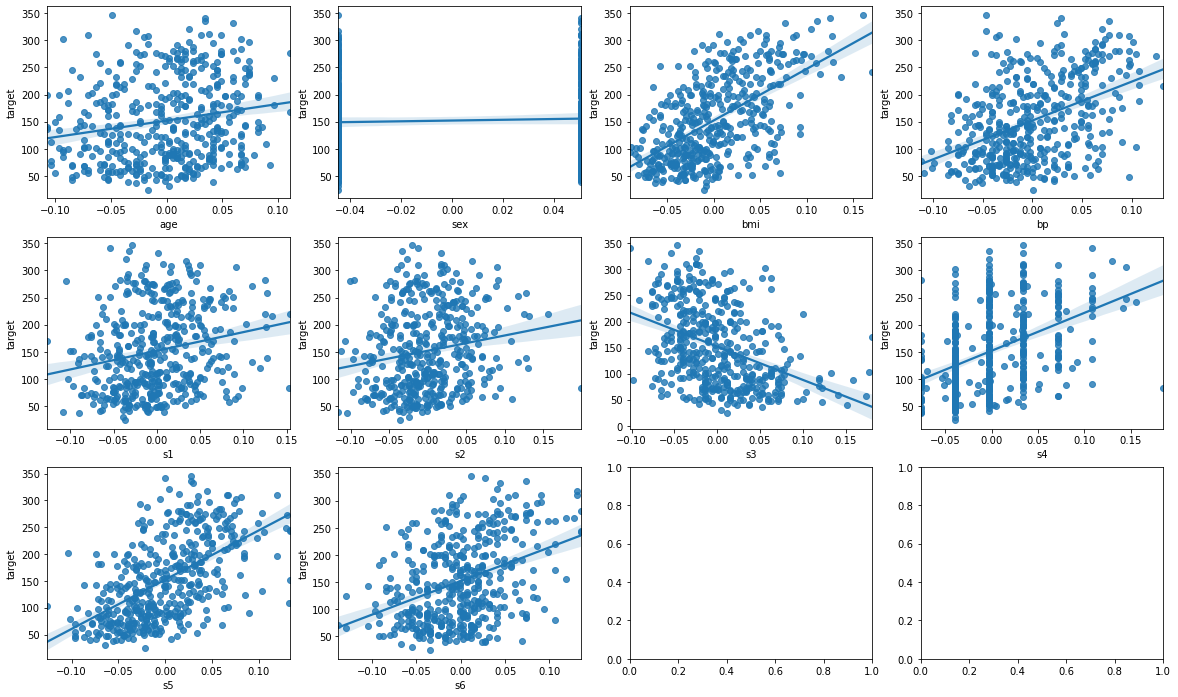

In [68]:
fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(20,12))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='target', data=df, ax=axis[row][col])

### 2-1. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [48]:
# y = diabetes.target
# X = df['bmi'].values.reshape(-1,1)
# lr = LinearRegression()
# lr.fit(X, y)
# lr.score(X, y)

In [70]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

In [72]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [73]:
pred = lr2.predict(X_test)

In [74]:
lr2.score(X_test, y_test)

0.12182329052160201

### 2-2. Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
pred2 = dtr.predict(X_test)

In [77]:
dtr.score(X_test, y_test)

0.06855350357481471

In [78]:
params = {
    'max_depth': [2,3,4,5,6,7,8]
}

In [79]:
from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(dtr, param_grid=params, scoring='neg_mean_squared_error', cv=3)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [80]:
grid_dt.best_params_

{'max_depth': 2}

In [81]:
best_dt = grid_dt.best_estimator_
best_dt.score(X_test, y_test)

0.08419768022211016

### 3. MSE

In [82]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse2 = mean_squared_error(y_test, pred2)
mse, mse2

(3825.0758113113457, 4057.1031143867044)